<a href="https://colab.research.google.com/github/Nguyen-Ngoc-Nhi/Climate-Analysis/blob/main/model_predict_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Book10.xlsx')
data

,Unnamed: 0,Year,temperature,humidity,precip,Winter_Spring_production,Summer_production
0,0,2002,23.954776,85.919877,3.483915,574.1,507.5
1,1,2003,24.761690,82.851326,4.066104,585.8,344.9
2,2,2004,23.851234,82.871540,3.668133,585.4,484.1
3,3,2005,23.903875,83.119110,4.242288,590.1,391.5
4,4,2006,24.436222,82.242961,3.940554,584.1,495.5
5,5,2007,24.295997,81.732097,3.233891,498.6,516.2
6,6,2008,23.351818,83.248980,4.851394,589.4,515.8
7,7,2009,24.409767,82.866893,3.882162,585.3,520.5
8,8,2010,24.614622,83.096784,4.209762,583.7,520.7
9,9,2011,23.204478,82.956473,4.740178,598.5,492.8


In [9]:
# Step 2: Scale the data (crop production and temperature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Winter_Spring_production', 'Summer_production', 'temperature','humidity',	'precip']])

## a. Using Random Forest




In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [12]:
X = data[['temperature','humidity',	'precip']].values  # Temperature as the feature
y = data['Winter_Spring_production'].values  # Crop production as the target

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor # import the RandomForestRegressor class from sklearn.ensemble module

# Now you can use RandomForestRegressor:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [18]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # import mean_absolute_error along with other metrics

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) # Now mean_absolute_error should be defined and work correctly
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 75.40
Mean Absolute Error: 6.87
R^2 Score: 0.47


In [23]:
# Columns for features and targets
X = scaled_data[:, 0].reshape(-1, 1)  # Temperature as the feature
y_winter_spring = scaled_data[:, 1]    # Winter_Spring_production as target
y_summer = scaled_data[:, 2]           # Summer_production as target

# Split data into training and testing sets
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_winter_spring, test_size=0.2, random_state=42)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_summer, test_size=0.2, random_state=42)

# Linear regression models
model_winter = LinearRegression()
model_summer = LinearRegression()

# Train the models
model_winter.fit(X_train, y_train_w)
model_summer.fit(X_train, y_train_s)

# Predictions
y_pred_w = model_winter.predict(X_test)
y_pred_s = model_summer.predict(X_test)

# Mean Squared Errors
mse_w = mean_squared_error(y_test_w, y_pred_w)
mse_s = mean_squared_error(y_test_s, y_pred_s)

print(f"Mean Squared Error for Winter Production: {mse_w:.4f}")
print(f"Mean Squared Error for Summer Production: {mse_s:.4f}")


Mean Squared Error for Winter Production: 0.2036
Mean Squared Error for Summer Production: 0.0880


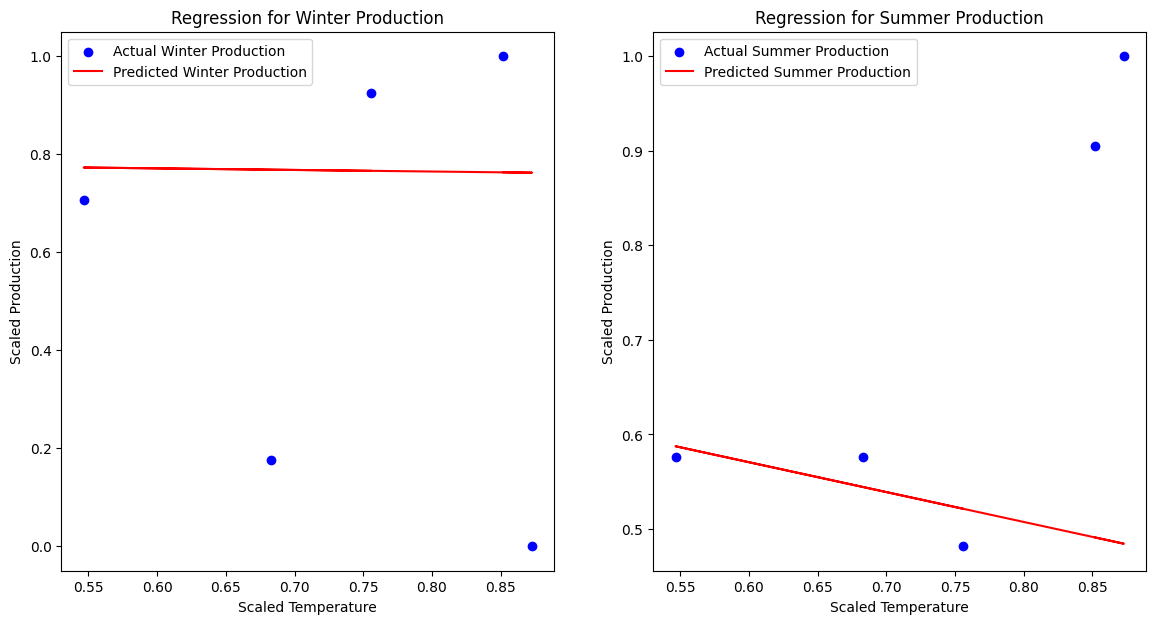

In [24]:
# Plotting results
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test_w, color='blue', label='Actual Winter Production')
plt.plot(X_test, y_pred_w, color='red', label='Predicted Winter Production')
plt.title('Regression for Winter Production')
plt.xlabel('Scaled Temperature')
plt.ylabel('Scaled Production')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test_s, color='blue', label='Actual Summer Production')
plt.plot(X_test, y_pred_s, color='red', label='Predicted Summer Production')
plt.title('Regression for Summer Production')
plt.xlabel('Scaled Temperature')
plt.ylabel('Scaled Production')
plt.legend()

plt.show()